In [79]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

# Create Data

In [171]:
function = 'Sum of Trig Functions'

In [65]:
def f(t):
    return np.sin(2 * np.pi * t) + 0.8 * np.cos(2 * np.pi * t / 3 + 0.1) + 0.5 * np.cos(2 * np.pi * t / 5 + 0.2) + 0.3 * np.cos(2 * np.pi * t / 11 + 0.3) + 0.1 * np.cos(2 * np.pi * t / 17 + 0.4)

In [66]:
np.random.seed(0) # fix seed

In [67]:
N = 100000 # number of points

x = np.random.uniform(0, 1, (N, 1)) # sample points uniformly from 
y = f(x) # create label (function value) vector

train_cutoff = 6 * N // 10 # split data into 60% training,
val_cutoff = 8 * N // 10 # 20% validation and 20% testing

x_train = x[:train_cutoff]
y_train = y[:train_cutoff]

x_val = x[train_cutoff:val_cutoff]
y_val = y[train_cutoff:val_cutoff]

x_test = x[val_cutoff:]
y_test = y[val_cutoff:]

# Error versus Number of Neurons

We first define our own error metric that corresponds to the results in the theoretical section of the paper.

In [69]:
def max_error(y_true, y_pred):
    return K.max(K.abs(y_pred - y_true))

In [70]:
max_neurons = 100
inc = 2 * 5
neuron_counts = np.linspace(inc, max_neurons, inc, dtype = int)
show = 3 # show training every 'show' steps
epochs = 60

In [71]:
mae = np.zeros(neuron_counts.shape[0])
max_err = np.zeros(neuron_counts.shape[0])
json_models = {} # store models in json format
weights = {} # store model weights

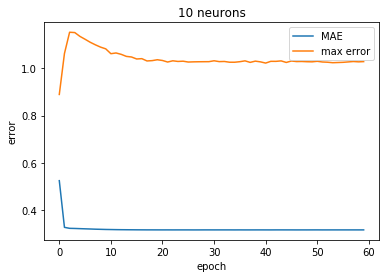

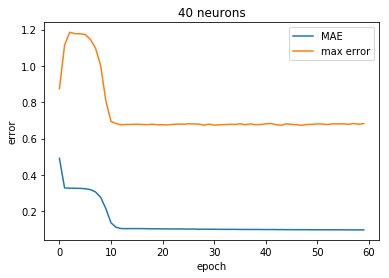

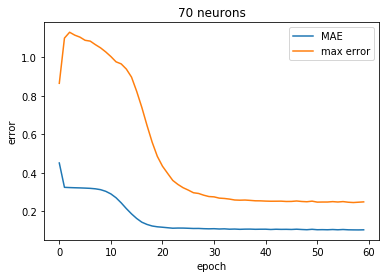

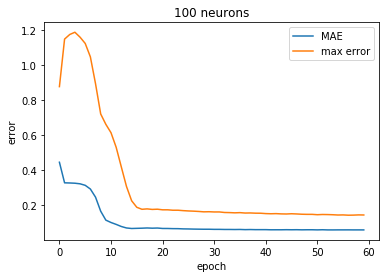

In [72]:
for i in range(neuron_counts.shape[0]):
    
    model = tf.keras.models.Sequential([
                  tf.keras.layers.Dense(neuron_counts[i],  kernel_initializer='normal', activation = tf.nn.relu),
                  tf.keras.layers.Dense(1,  kernel_initializer='normal', activation = 'linear')
            ])

    model.compile(optimizer='sgd', loss='mae', metrics=['mae', max_error])
    
    history = model.fit(x_train, y_train, epochs = epochs, verbose = 0)
    
    json_models[i] = model.to_json()
    weights[i] = model.get_weights()
    
    (loss, mae[i], max_err[i]) = model.evaluate(x_val, y_val, verbose = 0)
    
    if(i % show == 0):
        plt.figure()
        plt.title('{} neurons'.format(neuron_counts[i]))
        plt.plot(history.history['mean_absolute_error'], label = "MAE");
        plt.plot(history.history['max_error'], label = "max error");
        plt.ylabel('error');
        plt.xlabel('epoch');
        plt.legend();
        plt.show();
        plt.close()

Create $\omega$ vector for the sequence of neuron counts considered above.

In [ ]:
L = 8.2 # lipshitz constant
n = (neuron_counts - 1) / 2 # 2n + 1 neurons -> omega(f, 1/n)
bound = 0.5 * (L / n) + (L / (2 * n)) # bound = 0.5 * omega(f, 1/n) +  omega(f, 1/2n)

Compare omega to our defined error and to MAE.

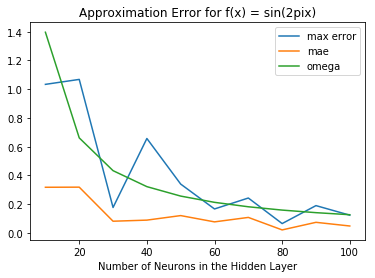

In [172]:
plt.figure()
plt.plot(neuron_counts, max_err, label = "max error");
plt.plot(neuron_counts, mae, label = "mae");
plt.plot(neuron_counts, bound, label = "omega");
plt.xlabel('Number of Neurons in the Hidden Layer');
plt.title('Approximation Error for f(x) = '+function);
plt.legend(); 
plt.savefig(function+'_'+'error'+'.png')
plt.close()

Compare predicted function to actual function for a particular model.

In [142]:
num_points = 1000
x_axis = np.reshape(np.linspace(0,1,num=num_points),[num_points,1])
y_true = f(x_axis)
y_pred = np.zeros([10,num_points])

In [143]:
for i in range(10):
    model = model_from_json(json_models[i])
    model.set_weights(weights[i])
    y_pred[i,:] = model.predict(x_axis, verbose = 0).ravel()

In [173]:
for i in range(10):    
    neurons = (i+1)*10
    result=plt.figure()
    plt.plot(x_axis,y_true,label = "true function");
    plt.plot(x_axis,y_pred[i,:], label = "prediction");
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.title('Function Approximation for f(x) = '+function+' using '+str(neurons)+' Neurons')
    plt.legend();
    plt.savefig(function+'_'+str(neurons)+'.png')
    plt.close()

In [175]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 11):
    ax = fig.add_subplot(2, 5, i)
    ax.plot(x_axis,y_true,label = "true function");
    ax.plot(x_axis,y_pred[i-1,:], label = "prediction");
    ax.set_title(str(i*10)+' Neurons')
plt.savefig(function+'_'+'approximations'+'.png')
plt.close()